### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 5

Текст задания:
1. Набор данных: wine_quality

2. Независимые признаки: features/chlorides, features/alcohol

3. Метка класса: quality

4. Показатель бинарной классификации:

- 𝑇𝑃 (True Positives) – число корректно спрогнозированных точек в положительном классе

5. Параметры нейронных сетей:

- Кол-во скрытых слоев: 4

- Кол-во нейронов в слое: 64

- Оптимизаторы: Adagrad, AdamW, RMSprop

- Функция активации в скрытых слоях: selu

### Решение:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса. Оставьте в наборе признаки, принимающие числовые значения.

In [73]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
data_set = tfds.load("wine_quality", split='train')
data_frame = tfds.as_dataframe(data_set)
data_frame.dtypes

features/alcohol                 float32
features/chlorides               float32
features/citric acid             float32
features/density                 float32
features/fixed acidity           float32
features/free sulfur dioxide     float32
features/pH                      float32
features/residual sugar          float32
features/sulphates               float64
features/total sulfur dioxide    float32
features/volatile acidity        float32
quality                            int32
dtype: object

Как видно, все признаки числовые.

2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [75]:
df = data_frame[['features/chlorides', 'features/alcohol', 'quality']]
df.shape

(4898, 3)

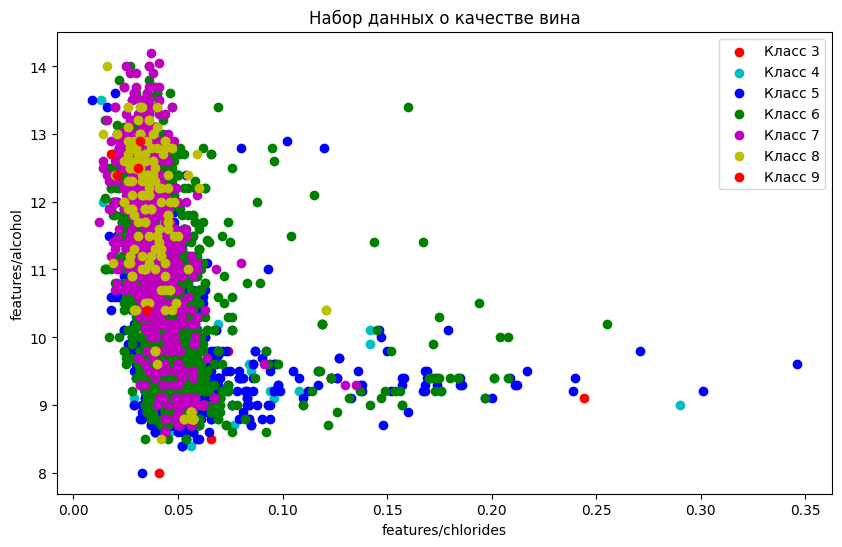

In [76]:
classes = sorted(df['quality'].unique())
class_data = {c: df[df['quality'] == c] for c in classes}

colors = ['r', 'c', 'b', 'g', 'm', 'y']

plt.figure(figsize=(10, 6))
for i, c in enumerate(classes):
  plt.scatter(class_data[c]['features/chlorides'], class_data[c]['features/alcohol'],
              label=f'Класс {c}', color=colors[i % len(colors)])

plt.xlabel('features/chlorides')
plt.ylabel('features/alcohol')
plt.title('Набор данных о качестве вина')
plt.legend()

3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

In [77]:
df['quality'].unique()

array([5, 6, 4, 8, 7, 3, 9], dtype=int32)

In [78]:
df['quality'].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

In [79]:
df_binary = df.copy()
df_binary['quality'] = df_binary['quality'].apply(lambda x: 1 if x in [6, 8, 9] else 0)
df_binary['quality'].value_counts()

quality
0    2520
1    2378
Name: count, dtype: int64

4. Разбейте набор данных из двух признаков и бинарных меток класса на обучающую и тестовую выборки. Постройте нейронные сети с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите их на обучающей выборке, контролируя процесс обучения нейронных сетей. Определите нейронную сеть с более высоким качеством бинарной классификации по показателю бинарной классификации, указанному в индивидуальном задании.

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adagrad, AdamW, RMSprop
from sklearn.datasets import make_circles

In [110]:
x = df_binary[['features/chlorides', 'features/alcohol']]
y = df_binary['quality']

n_samples = df_binary.shape[0]
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3918, 2), (980, 2), (3918,), (980,))

In [111]:
feature_normalizer = tf.keras.layers.Normalization(axis=None, input_shape=(x.shape[1],))
feature_normalizer.adapt(x_train)

models = {}
optimizers = {
    "Adagrad": tf.keras.optimizers.Adagrad(),
    "AdamW": tf.keras.optimizers.AdamW(),
    "RMSprop": tf.keras.optimizers.RMSprop()
}

for optimizer_name, optimizer in optimizers.items():
  model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(
      loss=tf.keras.losses.binary_crossentropy,
      optimizer=optimizer,
      metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
  model.fit(x_train, y_train, epochs=5, verbose=0)
  models[optimizer_name] = model

  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  print(f"Оптимизатор: {optimizer_name}, Точность: {test_acc}, Потеря: {test_loss}")


Оптимизатор: Adagrad, Точность: 0.7489795684814453, Потеря: 0.6774699091911316
Оптимизатор: AdamW, Точность: 1.0, Потеря: 0.018996017053723335
Оптимизатор: RMSprop, Точность: 0.9979591965675354, Потеря: 0.04436026141047478


In [112]:
for optimizer_name, model in models.items():
    prediction = model.predict(x_test)
    y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
    tp = np.sum((y_test == 1) & (y_pred == 1))
    print(f"Оптимизатор: {optimizer_name}, True Positives: {tp}")

31/31 [==============================] - 0s 2ms/step
Оптимизатор: Adagrad, True Positives: 430
31/31 [==============================] - 0s 1ms/step
Оптимизатор: AdamW, True Positives: 490
31/31 [==============================] - 0s 1ms/step
Оптимизатор: RMSprop, True Positives: 490


Нейронная сеть с более высоким качеством бинарной классификации по показателю TP 2 оптизимизатора, возьмем RMSprop.

5. Визуализируйте границы принятия решений построенных нейронных сетей на отдельных рисунках на всем наборе данных из двух признаков и бинарных меток классов.

In [113]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step


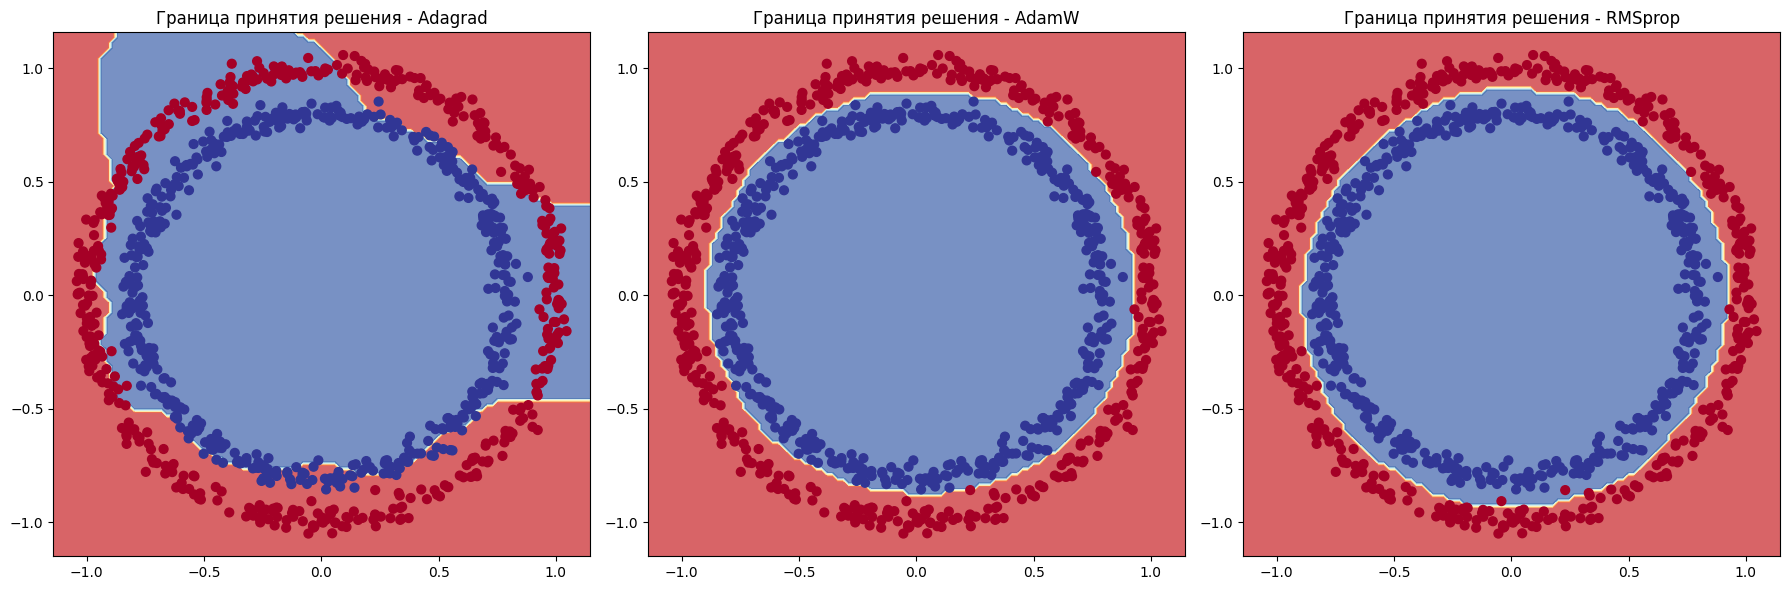

In [114]:
plt.figure(figsize=(18, 6))

for i, (optimizer_name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plot_decision_boundary(model, x_test, y_test)
    plt.title(f'Граница принятия решения - {optimizer_name}')

plt.tight_layout()
plt.show()

6. Визуализируйте на одном рисунке ROC-кривые для построенных классификаторов на основе нейронных сетей, вычислите площади под ROC-кривыми методом трапеций или иным методом и создайте легенду с указанием площадей кривых.

In [86]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [87]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

31/31 [==============================] - 0s 3ms/step


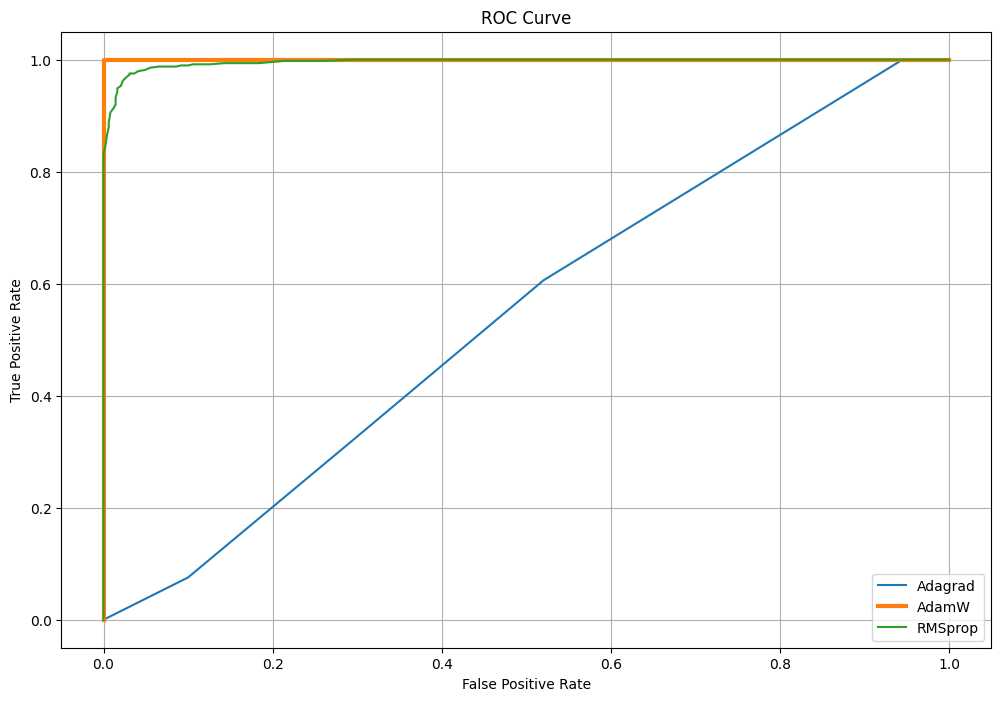

Площадь под ROC-кривой для Adagrad: 0.54
Площадь под ROC-кривой для AdamW: 1.00
Площадь под ROC-кривой для RMSprop: 1.00


In [88]:
auc_scores = []
plt.figure(figsize=(12, 8))

for optimizer_name, model in models.items():
  y_pred = model.predict(x_test)
  ROC = roc_from_scratch(y_pred.reshape(-1), y_test, partitions=50)
  if optimizer_name == "AdamW":
    plt.plot(ROC[:,0], ROC[:,1], label=optimizer_name, linewidth=3)
  else:
    plt.plot(ROC[:,0], ROC[:,1], label=optimizer_name)
  auc_score = np.trapz(sorted(ROC[:,1]), sorted(ROC[:,0]))
  auc_scores.append(auc_score)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

for i, optimizer_name in enumerate(models.keys()):
    print(f'Площадь под ROC-кривой для {optimizer_name}: {auc_scores[i]:.2f}')


7. Определите исходном наборе данных дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и имеющий максимальную дисперсию.

Все данные в датасете непрерывные, кроме метки класса.

In [89]:
data_frame.dtypes

features/alcohol                 float32
features/chlorides               float32
features/citric acid             float32
features/density                 float32
features/fixed acidity           float32
features/free sulfur dioxide     float32
features/pH                      float32
features/residual sugar          float32
features/sulphates               float64
features/total sulfur dioxide    float32
features/volatile acidity        float32
quality                            int32
dtype: object

In [90]:
data_frame.var().idxmax(), data_frame.var().max()

('features/total sulfur dioxide', 1806.08544921875)

Дополнительный признак: features/total sulfur dioxide

8. Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [91]:
from mpl_toolkits.mplot3d import Axes3D

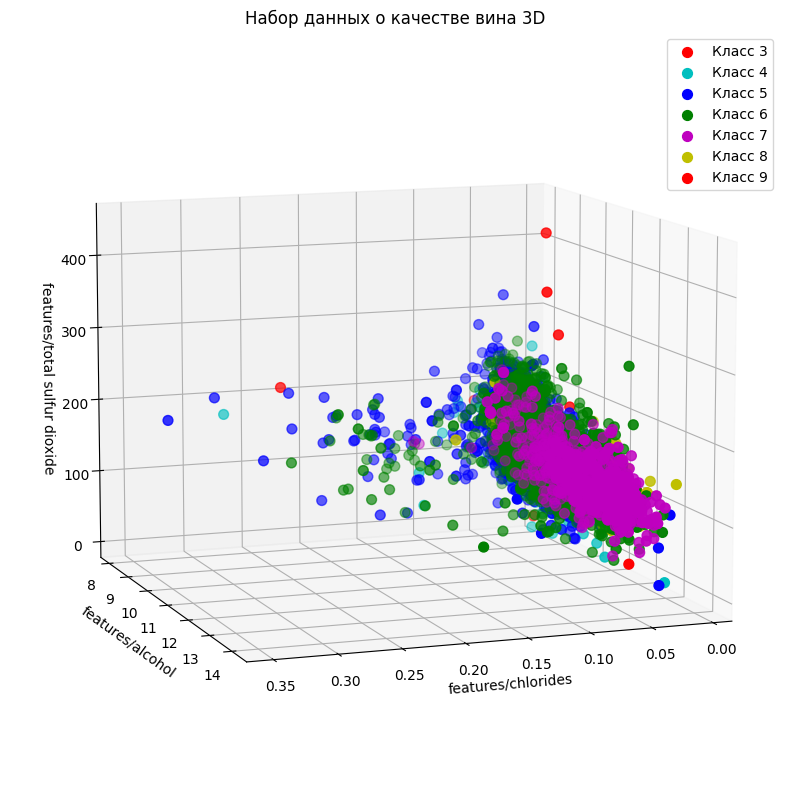

In [92]:
df_multiclass = data_frame[['features/chlorides', 'features/alcohol', 'features/total sulfur dioxide', 'quality']]

сlasses_multi = sorted(df_multiclass['quality'].unique())
class_multi_data = {c: df_multiclass[df_multiclass['quality'] == c] for c in сlasses_multi}
colors = ['r', 'c', 'b', 'g', 'm', 'y']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(classes):
    ax.scatter(class_multi_data[c]['features/chlorides'],
               class_multi_data[c]['features/alcohol'],
               class_multi_data[c]['features/total sulfur dioxide'],
               label=f'Класс {c}', color=colors[i % len(colors)], s=50)

ax.set_xlabel('features/chlorides')
ax.set_ylabel('features/alcohol')
ax.set_zlabel('features/total sulfur dioxide')
ax.set_title('Набор данных о качестве вина 3D')
ax.view_init(elev = 10, azim = 70)
plt.legend()

9. Разбейте исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.

In [115]:
X = df_multiclass[['features/chlorides', 'features/alcohol', 'features/total sulfur dioxide']]
Y = df_multiclass['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3428, 3), (1470, 3), (3428,), (1470,))

In [116]:
np.unique(Y_train)

array([3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [117]:
np.unique(Y_test)

array([3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [118]:
def to_one_hot(labels, dimension=None):
    if dimension is None:
      dimension = np.max(labels) + 1
    results = np.zeros((len(labels), dimension - np.min(labels)))
    for i, label in enumerate(labels):
        results[i, label - np.min(labels)] = 1.
    return results

In [119]:
Y_train = to_one_hot(Y_train)
Y_test = to_one_hot(Y_test)
Y_train.shape, Y_test.shape

((3428, 7), (1470, 7))

In [121]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='selu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='selu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='selu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='selu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(7, activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

In [122]:
history = model.fit(X_train,
                    Y_train,
                    epochs=500,
                    verbose=1,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/500
43/43 [==============================] - 1s 8ms/step - loss: 3.3028 - accuracy: 0.3439 - val_loss: 1.3569 - val_accuracy: 0.3440
Epoch 2/500
43/43 [==============================] - 0s 3ms/step - loss: 1.5604 - accuracy: 0.3811 - val_loss: 1.5005 - val_accuracy: 0.4504
Epoch 3/500
43/43 [==============================] - 0s 3ms/step - loss: 1.4619 - accuracy: 0.3873 - val_loss: 1.4994 - val_accuracy: 0.4431
Epoch 4/500
43/43 [==============================] - 0s 3ms/step - loss: 1.4297 - accuracy: 0.4055 - val_loss: 1.4294 - val_accuracy: 0.4504
Epoch 5/500
43/43 [==============================] - 0s 4ms/step - loss: 1.4628 - accuracy: 0.3895 - val_loss: 1.3758 - val_accuracy: 0.3134
Epoch 6/500
43/43 [==============================] - 0s 3ms/step - loss: 1.4362 - accuracy: 0.3910 - val_loss: 1.5905 - val_accuracy: 0.3120
Epoch 7/500
43/43 [==============================] - 0s 3ms/step - loss: 1.4207 - accuracy: 0.3957 - val_loss: 1.2637 - val_accuracy: 0.3994
Epoch 8/500
4

In [123]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Потери на тестовых данных: {test_loss}")
print(f"Точность на тестовых данных: {test_accuracy}")

Потери на тестовых данных: 1.212294101715088
Точность на тестовых данных: 0.4503401219844818


10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

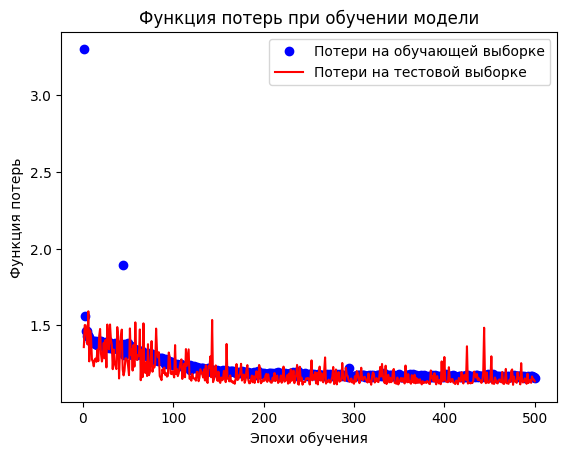

In [124]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "r", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();

Сеть плохо обучается, но делает вид, что обучается.